<a href="https://colab.research.google.com/github/abraham-john-paul/AppliedAICourse/blob/main/5_Performance_metrics_Instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compute performance metrics for the given Y and Y_score without sklearn

In [79]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [80]:
# write your code here
data = np.loadtxt('/content/5_a.csv', delimiter=',', skiprows=1)
print('no. of positive data: ', np.sum(data[:, 0] == float(1)))
print('no. of negetive data: ', np.sum(data[:, 0] != float(1)))
# pd_data = pd.read_csv('/content/5_a.csv')
# print(pd_data['y'].value_counts())

no. of positive data:  10000
no. of negetive data:  100


In [81]:
# Creating y_pred
y_pred = np.where(data[:, 1] > 0.5, 1, 0)
y = data[:, 0]

In [82]:
# Calculatiing no, of TP, TN, FP, FN
nTP = (np.logical_and(y == 1.0, y_pred == 1)).sum()
nTN = (np.logical_and(y == 0.0, y_pred == 0)).sum()
nFP = (np.logical_and(y == 0.0, y_pred == 1)).sum()
nFN = (np.logical_and(y == 1.0, y_pred == 0)).sum()
# print(nTP, nTN, nFP, nFN)
# Creating confusion matrix from TP, TN, FP, FN
confusion_matrix = np.array([[nTP, nFP], [nFN, nTN]])
print('confusion matrix :', confusion_matrix)

confusion matrix : [[10000   100]
 [    0     0]]


In [83]:
# Caluculating Precision and Recall
precision = nTP / (nTP + nFP)
recall = nTP / (nTP + nFN)
print('precision :', precision)
print('recall :', recall)

precision : 0.9900990099009901
recall : 1.0


In [84]:
# Computing F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)
print('f1 score :', f1_score)

f1 score : 0.9950248756218906


In [85]:
# Computing Accuracy Score
accuracy_score = np.trace(confusion_matrix) / np.sum(confusion_matrix)
print('accuracy score :', accuracy_score)

accuracy score : 0.9900990099009901


In [86]:
# Computing AUC Score
data = data[data[:,1].argsort()[::-1][:n]]
probabiltiy_score = data[:, 1]
y = data[:, 0]
plotting_data = []
# y = data[:, 1]
for threshold in probabiltiy_score:
    threshold_y_pred = np.where(probabiltiy_score > threshold, 1, 0)
    nTP = (np.logical_and(y == 1.0, threshold_y_pred == 1)).sum()
    nFN = (np.logical_and(y == 1.0, threshold_y_pred == 0)).sum()
    nFP = (np.logical_and(y == 0.0, threshold_y_pred == 1)).sum()
    nTN = (np.logical_and(y == 0.0, threshold_y_pred == 0)).sum()
    TPR = nTP/(nTP + nFN)
    FPR = nFP / (nTN + nFP)
    plotting_data.append([TPR, FPR])
df = pd.DataFrame(data=plotting_data, columns=['TPR', 'FPR'])
tpr_array = np.array([i for i, _ in plotting_data])
fpr_array = np.array([i for _, i in plotting_data])
auc_score = np.trapz(tpr_array, fpr_array)
print('auc score :', auc_score)

auc score : 0.48829900000000004


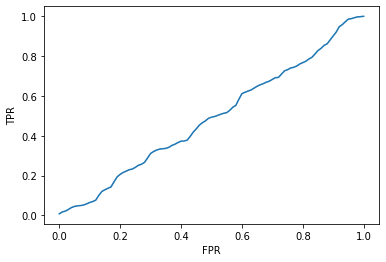

In [87]:
import seaborn as sns
sns.lineplot(x='FPR', y='TPR', data=df)

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [88]:
# write your code
df = pd.read_csv('/content/5_b.csv')
df.y.value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

In [89]:
df['y_pred'] = df.apply(lambda row: 0 if row.proba < 0.5 else 1, axis=1)

In [90]:
nTP = len(df[(df['y'] == 1.0) & (df['y_pred'] == 1)])
nTN = len(df[(df['y'] == 0.0) & (df['y_pred'] == 0)])
nFP = len(df[(df['y'] == 0.0) & (df['y_pred'] == 1)])
nFN = len(df[(df['y'] == 1.0) & (df['y_pred'] == 0)])
# Computing Confusion Matrix
confusion_matrix = np.array([[nTP, nFP], [nFN, nTN]])
print('confusion matrix :', confusion_matrix)

confusion matrix : [[  55  239]
 [  45 9761]]


In [91]:
# Caluculating Precision and Recall
precision = nTP / (nTP + nFP)
recall = nTP / (nTP + nFN)
print('precision :', precision)
print('recall :', recall)

precision : 0.1870748299319728
recall : 0.55


In [92]:
# Computing F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)
print('f1 score :', f1_score)

f1 score : 0.2791878172588833


In [93]:
# Computing Accuracy Score
accuracy_score = np.trace(confusion_matrix) / np.sum(confusion_matrix)
print('accuracy score :', accuracy_score)

accuracy score : 0.9718811881188119


In [94]:
# Computing AUC Score
df = df.sort_values(by=['proba'], ascending=False)
probabiltiy_score = df['proba'].unique()
y = df['y'].to_numpy()
plotting_data = []
for threshold in probabiltiy_score:
    threshold_y_pred = np.where(probabiltiy_score >= threshold, 1, 0)
    nTP = (np.logical_and(y == 1.0, threshold_y_pred == 1)).sum()
    nFN = (np.logical_and(y == 1.0, threshold_y_pred == 0)).sum()
    nFP = (np.logical_and(y == 0.0, threshold_y_pred == 1)).sum()
    nTN = (np.logical_and(y == 0.0, threshold_y_pred == 0)).sum()
    TPR = nTP/(nTP + nFN)
    FPR = nFP / (nTN + nFP)
    plotting_data.append([TPR, FPR])

plot_df = pd.DataFrame(data=plotting_data, columns=['TPR', 'FPR'])
tpr_array = np.array([i for i, _ in plotting_data])
fpr_array = np.array([i for _, i in plotting_data])
auc_score = np.trapz(tpr_array, fpr_array)
print('auc score :', auc_score)

auc score : 0.9377570000000001


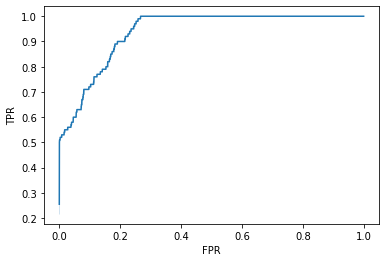

In [95]:
import seaborn as sns
sns.lineplot(x='FPR', y='TPR', data=plot_df)

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [96]:
 # write your code
 df = pd.read_csv('/content/5_c.csv')
 df.columns

Index(['y', 'prob'], dtype='object')

In [97]:
df = df.sort_values(['prob'])
# df = df.groupby(['prob'], as_index=False)
probabiltiy_score = df['prob'].to_numpy()
y = df.y.to_numpy()
A_values = []
# y = data[:, 1]
for threshold in probabiltiy_score:
    threshold_y_pred = np.where(probabiltiy_score > threshold, 1, 0)
    nFP = (np.logical_and(y == 0.0, threshold_y_pred == 1)).sum()
    nFN = (np.logical_and(y == 1.0, threshold_y_pred == 0)).sum()
    A = 500 * nFN + 100 * nFP
    A_values.append(A)
print('best threshold :',min(A_values))

best threshold : 141000


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [98]:
data = np.loadtxt('/content/5_d.csv', delimiter=',', skiprows=1)
y = data[:, 0]
y_pred = data[:, 1]
n = len(data)
len(y), len(y_pred)

(157200, 157200)

In [99]:
mean_square_error = np.sum(np.power(y - y_pred, 2)) / len(data)
print('mean sqaure error :', mean_square_error)

mean sqaure error : 177.16569974554707


In [100]:
# Computing Mean Absolute Percentage Error
MAPE = np.sum(np.absolute(y - y_pred)) / np.sum(y)
print("MAPE :", MAPE)

MAPE : 0.1291202994009687


In [101]:
y_mean = np.mean(np.absolute(y))
total_sum_of_squares = np.sum(np.power(y - y_mean, 2))
sum_of_squares_of_residuals = np.sum(np.power(y - y_pred, 2))
coeff_of_determination = 1 - (sum_of_squares_of_residuals / total_sum_of_squares)
print('Coeff. of determination :', coeff_of_determination)

Coeff. of determination : 0.9563582786990937
